## Import Libraries

In [1]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datasets import load_dataset

%matplotlib inline

/opt/anaconda3/envs/nlp_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Dataset

In [2]:
# Load dataset
ds = load_dataset("fhai50032/SymptomsDisease246k")

# Convert to pandas DataFrame
df = pd.DataFrame(ds['train'])

# Adjust pandas display options to show full column content
pd.set_option('display.max_colwidth', None)

# Display the DataFrame
df.head()

,response,query
0,panic disorder,"anxiety and nervousness ,shortness of breath ,depressive or psychotic symptoms ,chest tightness ,palpitations ,irregular heartbeat ,breathing fast"
1,panic disorder,"shortness of breath ,depressive or psychotic symptoms ,dizziness ,insomnia ,palpitations"
2,panic disorder,"anxiety and nervousness ,depression ,shortness of breath ,depressive or psychotic symptoms ,dizziness ,insomnia ,palpitations ,irregular heartbeat ,breathing fast"
3,panic disorder,"anxiety and nervousness ,depressive or psychotic symptoms ,dizziness ,insomnia ,abnormal involuntary movements ,breathing fast"
4,panic disorder,"anxiety and nervousness ,depression ,insomnia ,abnormal involuntary movements ,chest tightness"


## Inspect Dataset

In [3]:
# Number of rows and columns
df.shape

(493890, 2)

In [4]:
# Information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493890 entries, 0 to 493889
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   response  493890 non-null  object
 1   query     493890 non-null  object
dtypes: object(2)
memory usage: 7.5+ MB


In [5]:
# Check for nulls
df.isnull().sum()

response    0
query       0
dtype: int64

In [6]:
# Change column names
df.columns = ['diseases', 'symptoms']
# Display DataFrame
df.head()

,diseases,symptoms
0,panic disorder,"anxiety and nervousness ,shortness of breath ,depressive or psychotic symptoms ,chest tightness ,palpitations ,irregular heartbeat ,breathing fast"
1,panic disorder,"shortness of breath ,depressive or psychotic symptoms ,dizziness ,insomnia ,palpitations"
2,panic disorder,"anxiety and nervousness ,depression ,shortness of breath ,depressive or psychotic symptoms ,dizziness ,insomnia ,palpitations ,irregular heartbeat ,breathing fast"
3,panic disorder,"anxiety and nervousness ,depressive or psychotic symptoms ,dizziness ,insomnia ,abnormal involuntary movements ,breathing fast"
4,panic disorder,"anxiety and nervousness ,depression ,insomnia ,abnormal involuntary movements ,chest tightness"


## Data Preparation

In [7]:
# Removing the string 'You may have' from diseases
df['diseases'] = df['diseases'].apply(lambda x: x.replace("You may have", "").strip())
# Removing the string 'Having these specific symptoms :->' from the query
df['symptoms'] = df['symptoms'].apply(lambda x: re.sub(r'.*:->', '', x).strip().lower())
# Removing the string 'may indicate' from the symptoms
df['symptoms'] = df['symptoms'].apply(lambda x: x.replace('may indicate', '').strip().lower())

## Exploratory Data Analysis

In [8]:
# Summary statistics of data
df.describe()

,diseases,symptoms
count,493890,493890
unique,773,169888
top,cystitis,"shortness of breath ,sharp chest pain"
freq,2438,60


### Univariate Analysis
#### Diseases

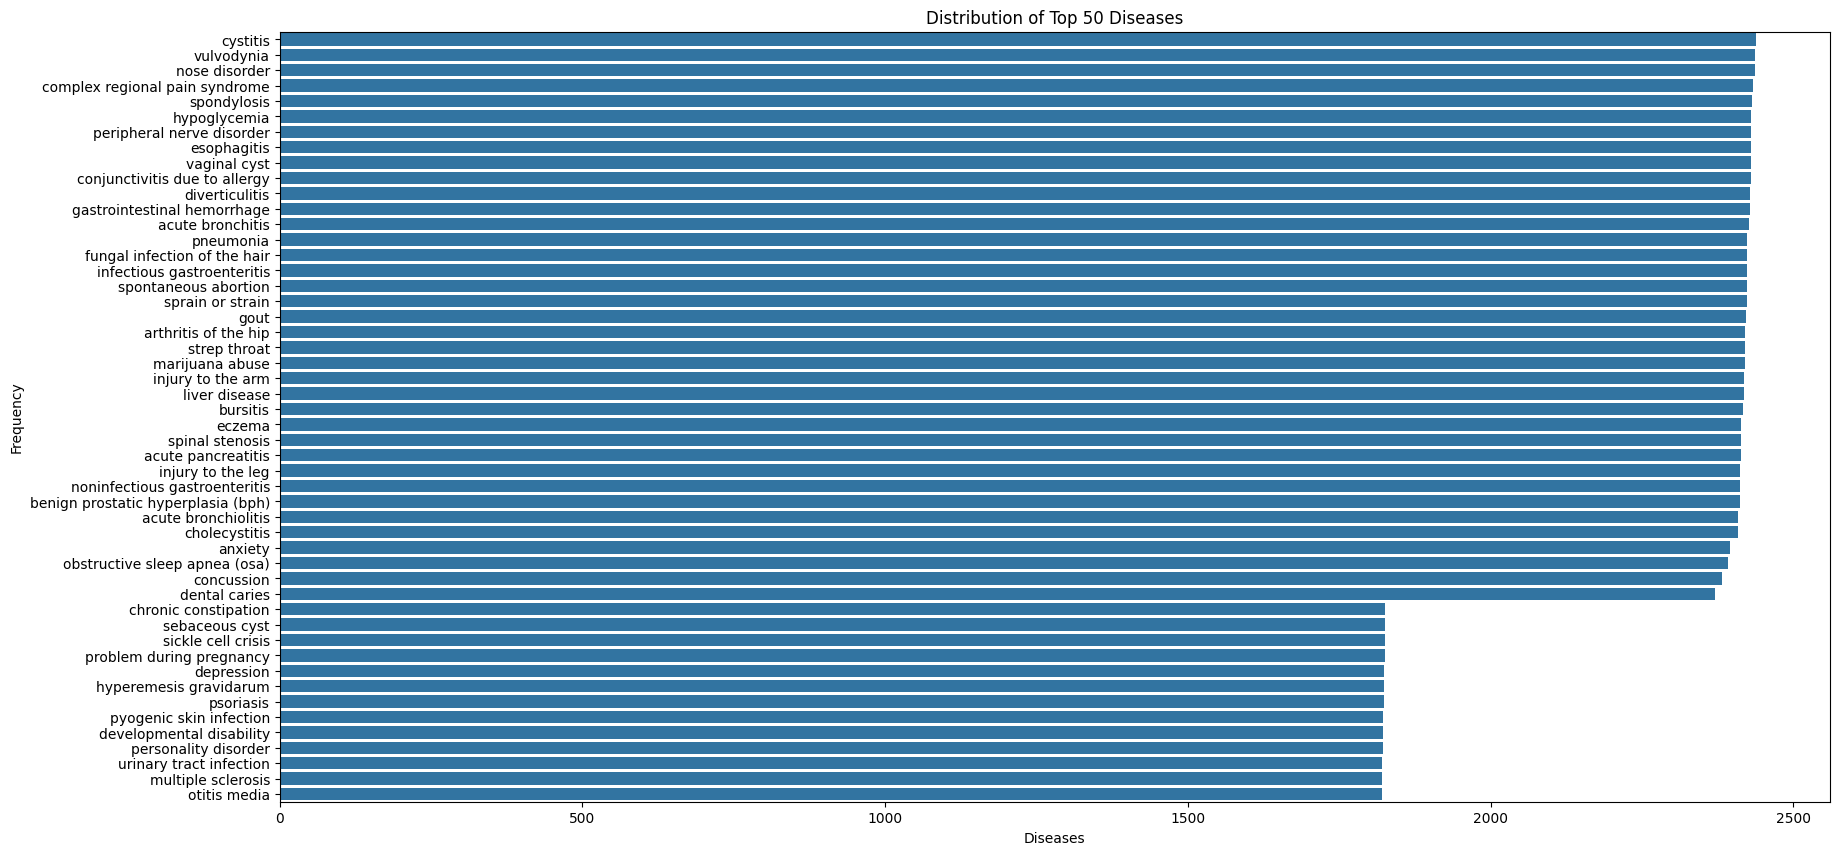

In [9]:
diseases_freq = df['diseases'].value_counts()
diseases_freq = diseases_freq.reset_index()
diseases_freq.columns = ['Diseases', 'Frequency']

# Selecting top 50 diseases
top_50_diseases_freq = diseases_freq.head(50)

plt.figure(figsize=(20, 10))

# Creating a bar plot
sns.barplot(x = 'Frequency', y = 'Diseases', data = top_50_diseases_freq)

# Adding labels and title
plt.xlabel('Diseases')
plt.ylabel('Frequency')
plt.title('Distribution of Top 50 Diseases')
plt.show()

#### Symptoms

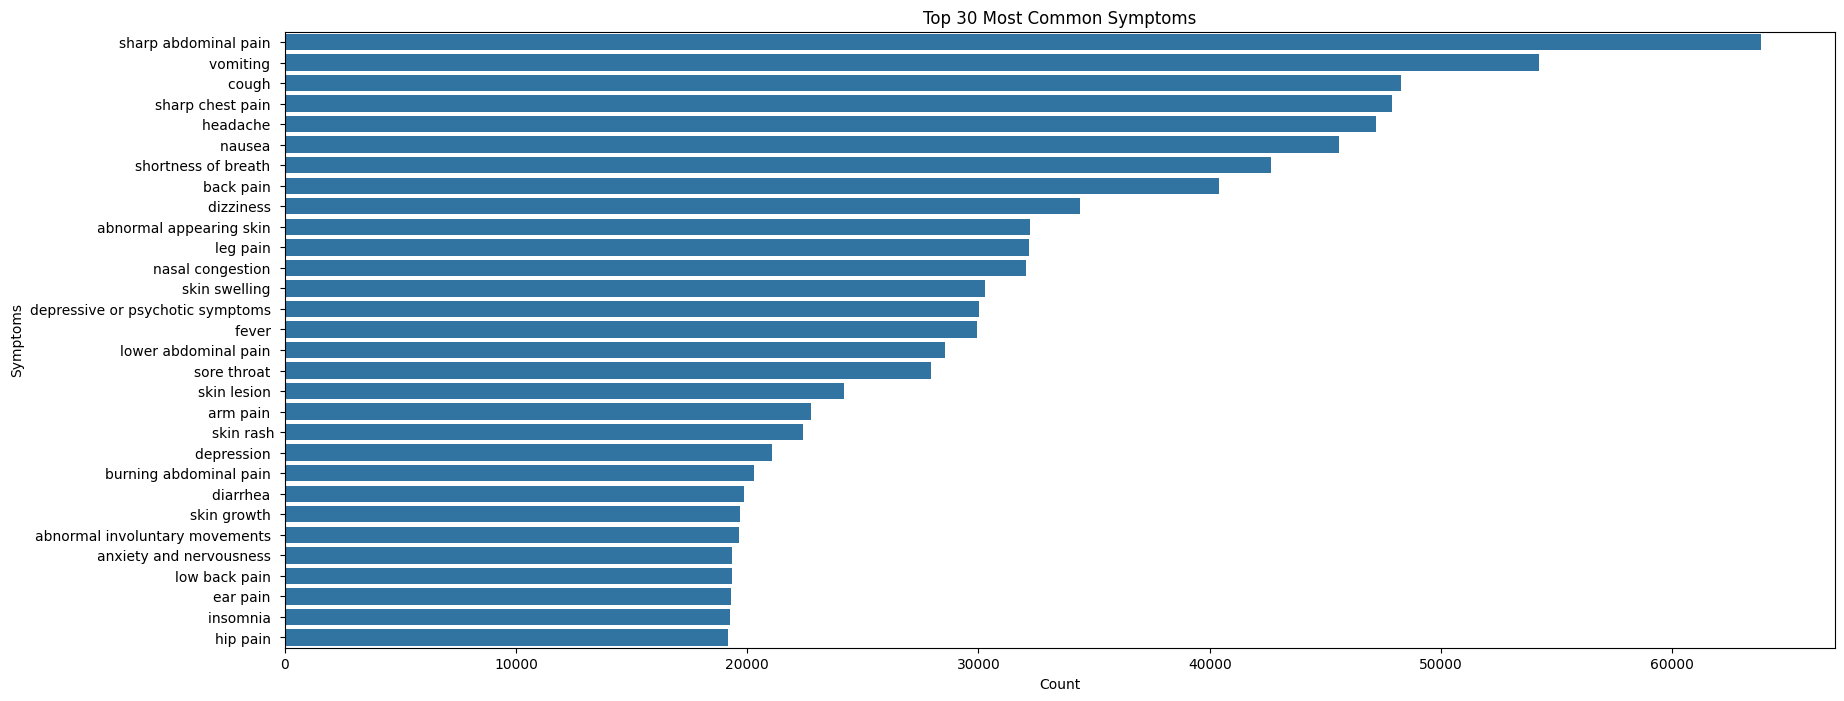

In [10]:
from collections import Counter

all_symptoms = ','.join(df['symptoms']).split(',')
symptom_counts = Counter(all_symptoms)

symptom_df = pd.DataFrame(symptom_counts.items(), columns=['Symptom', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(20, 8))

# Creating a bar plot
sns.barplot(y='Symptom', x='Count', data=symptom_df.head(30))

# Adding labels and title
plt.title('Top 30 Most Common Symptoms')
plt.xlabel('Count')
plt.ylabel('Symptoms')
plt.show()

### Multivariate Analysis
#### Diseases vs Symptomps

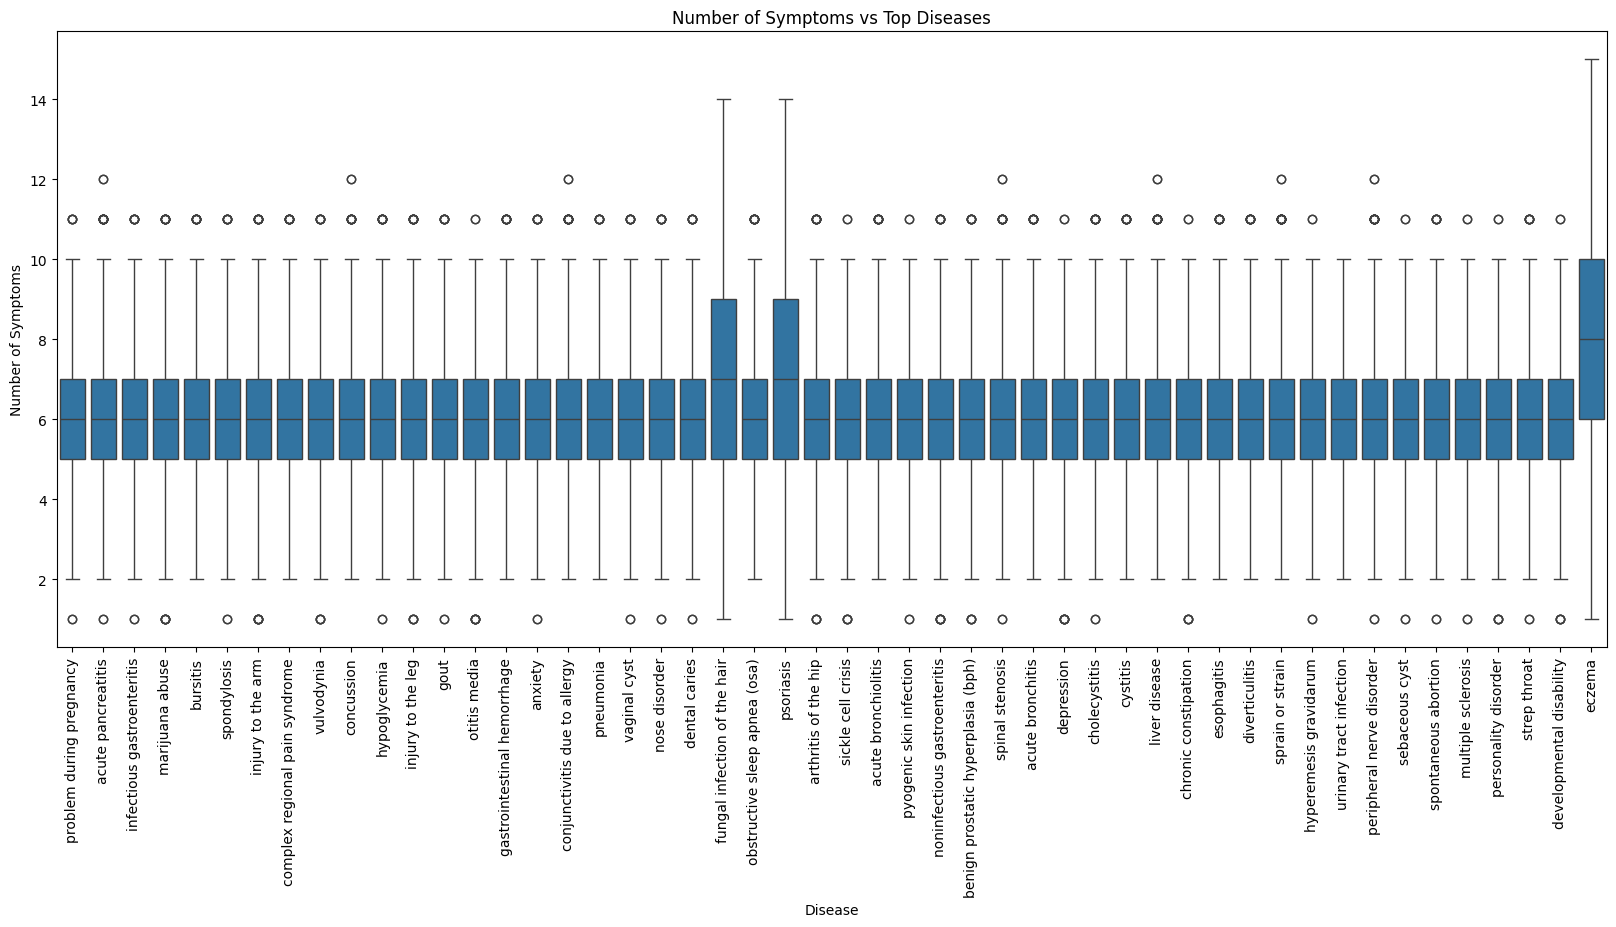

In [11]:
# Step 1: Create 'query_length' column
df['query_length'] = df['symptoms'].apply(lambda x: len(x.split(',')))

# Get the top 50 most common diseases
top_diseases = df['diseases'].value_counts().index[:50]

# Filter the DataFrame to include only the top diseases
df_top_diseases = df[df['diseases'].isin(top_diseases)]

# Plot the relationship between number of symptoms and top diseases
plt.figure(figsize=(20, 8))

sns.boxplot(x='diseases', y='query_length', data=df_top_diseases)

plt.title('Number of Symptoms vs Top Diseases')
plt.xlabel('Disease')
plt.ylabel('Number of Symptoms')
plt.xticks(rotation=90)
plt.show()

## Saving processed data

In [12]:
import os
# Create the data/processed directory if not exists
os.makedirs('../data/processed', exist_ok=True)
# Drop query_length column
df = df.drop(columns=['query_length'])
# Saving the Dataframe as a csv
df.to_csv('../data/processed/symptoms_disease.csv', index=False) 
